<a href="https://colab.research.google.com/github/AminaZahid/Roman-Urdu-Sentiment-Analysis-using-TF-IDF-CountVectorizer-with-LR/blob/main/Roman_Urdu_Sentiment_Analysis_using_TF_IDF_with_LR%2C_CountVectorizer_with_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#to work on text data
import re
import string

#for memory management
import gc 

#for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/RUD-1.csv',  usecols = [0,1])
data.head(3)

,Comment,sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive


In [4]:
data.columns = ['review','sentiment']

In [5]:
data.head(3)

,review,sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive


In [6]:
print("The size of the training data is: " + str(data.shape))
print(data.dtypes)

The size of the training data is: (14646, 2)
review       object
sentiment    object
dtype: object


In [7]:
# Data Cleaning

data.isna().sum()

review       0
sentiment    0
dtype: int64

In [8]:
data.dropna(inplace= True)

In [9]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [11]:
def clean_df(input_df):
    input_df['review'] = input_df['review'].apply(lambda x: ' '.join(x.split())) #removing blanks
    input_df['review'].replace('', np.nan, inplace = True) #replacing blanks with nan
    input_df.dropna(subset = ['review'], inplace = True) #dropping blank values
    return input_df 

In [12]:
data = clean_df(data)

In [13]:
data['sentiment'].value_counts()

Neutral     6852
Positive    4193
Negative    3489
Name: sentiment, dtype: int64

In [14]:
data[data['sentiment'] == 'Negative']

,review,sentiment
10100,Asif momin hakir nahi fakir hai mera sabr us N...,Negative
10101,Phely jaa kr Naha ky ao phr mazi ko khechna,Negative
10102,ye to bilkul thk kaha aur hamra km hi dushmano...,Negative
10103,Dukh hi dukh Zindhge mein,Negative
10104,Or ya assa he hotta ha.jassya khamosh samander...,Negative
...,...,...
14604,Jitni zor sy arsal ny hath chhurwaya hai jiya ...,Negative
14608,Mny mis KR di aj ki episode,Negative
14619,Jalal Khan aj jalal me agyaaa ha,Negative
14623,kashh wait na krna prta hoooo,Negative


In [15]:
data[data['sentiment'] == 'Positive']

,review,sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive
...,...,...
14637,Cool DJ Bhai ho toh h asa,Positive
14640,Mera bhi DJ fav hai (chotu reporter),Positive
14642,Kitna acha bhai hai kehta me daant kha lun ga ...,Positive
14643,DJ ko aik pappi idrrr aikk pappii udrr,Positive


In [16]:
data[data['sentiment'] == 'Neutral']

,review,sentiment
3762,hakeqat hy,Neutral
3763,Aor aisy bahut km hain ryt,Neutral
3764,jee ye to he,Neutral
3765,Hmm jysa kro gy wysa bhru gy,Neutral
3766,Ye kia hoa raha hain Pakistan main,Neutral
...,...,...
14634,Ab keraa nawaa katta kHolny laga hy dj,Neutral
14635,kia news ho skti hai any guesses?,Neutral
14638,Zahra chractor kia hota hay character suna tha,Neutral
14639,Hmm short mn likha hy to aesy hi hoga na ..,Neutral


Neutral     6852
Positive    4193
Negative    3489
Name: sentiment, dtype: int64



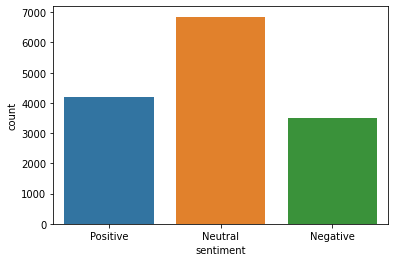

In [17]:
print(data['sentiment'].value_counts())
print()
sns.countplot(data['sentiment'])

In [18]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
# Downloads the data.
import nltk
nltk.download('stopwords')


# Using the stopwords.
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def review_preprocessing(input_review):
    input_review = input_review.astype(str).str.lower() #converting to lower case
    input_review = input_review.astype(str).str.replace('[{}]'.format(string.punctuation), '') #remove punctuation
    input_review = input_review.astype(str).str.replace("[^a-zA-Z#]",' ') #remove special characters
    input_review = input_review.apply(lambda x: ' '.join([word for word in str(x).split() if not word.isdigit() if not word in stopwordslist])) #remove numbers
    input_review = input_review.astype(str).str.strip() #remove spaces
    return input_review

In [27]:
data. duplicated().sum()

457

In [29]:
data = data.drop_duplicates(keep='first').reset_index(drop = True)

In [30]:
data.describe().transpose()

,count,unique,top,freq
review,14077,14053,Hahahah,2
sentiment,14077,3,Neutral,6560


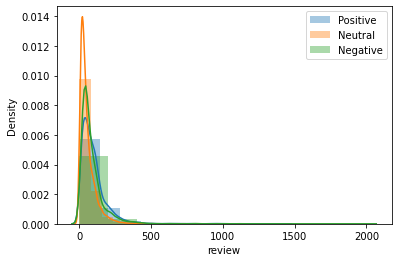

In [31]:
sns.distplot (data.review.str.len()[data['sentiment']=='Positive'], bins=10, label='Positive')
sns.distplot (data.review.str.len()[data['sentiment']=='Neutral'], bins=10, label='Neutral')
sns.distplot (data.review.str.len()[data['sentiment']=='Negative'], bins=10, label='Negative')
plt.legend()
plt.show()

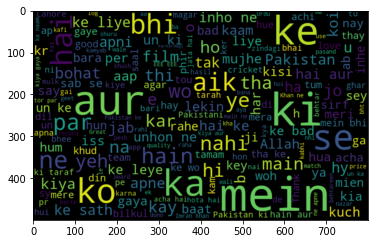

In [32]:
# Story generation from reviews
from wordcloud import WordCloud
all_words = ' '.join([word for word in data[data['sentiment'] == 'Positive']['review']])
wordcloud_gen = WordCloud(width=800, height=500, random_state=1, max_font_size=110).generate(all_words)
plt.imshow(wordcloud_gen, interpolation="bilinear")
plt.show()

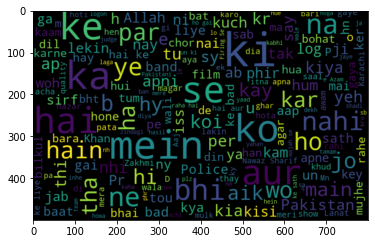

In [33]:
from wordcloud import WordCloud
all_words = ' '.join([word for word in data[data['sentiment'] == 'Negative']['review']])
wordcloud_gen = WordCloud(width=800, height=500, random_state=1, max_font_size=110).generate(all_words)
plt.imshow(wordcloud_gen, interpolation="bilinear")
plt.show()

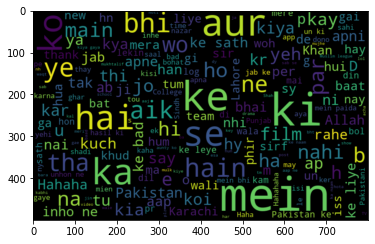

In [34]:
from wordcloud import WordCloud
all_words = ' '.join([word for word in data[data['sentiment'] == 'Neutral']['review']])
wordcloud_gen = WordCloud(width=800, height=500, random_state=1, max_font_size=110).generate(all_words)
plt.imshow(wordcloud_gen, interpolation="bilinear")
plt.show()

In [35]:
#Change sentiment to numerical value for modeling:
data['target'] = data['sentiment'].factorize()[0]
data.head()

,review,sentiment,target
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,0
1,sahi bt h,Positive,0
2,"Kya bt hai,",Positive,0
3,Wah je wah,Positive,0
4,Are wha kaya bat hai,Positive,0


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [37]:
from sklearn.model_selection import train_test_split

train_features,test_features, train_target, test_target = train_test_split(data['review'], data['target'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [38]:
cv = CountVectorizer(lowercase=False, stop_words=None, ngram_range=(1,2))
bow = cv.fit_transform(train_features)
bow.shape

(9853, 120554)

In [39]:
tfidf =TfidfVectorizer(stop_words=None, ngram_range=(1,2))
tfidf_features = tfidf.fit_transform(train_features)
tfidf_features.shape

(9853, 112547)

In [40]:
from gensim.models import Word2Vec
train_features_w2v = train_features.reset_index()['review']
test_features_w2v = test_features.reset_index()['review']
tokenized_train_features_w2v = train_features_w2v.apply(lambda x:x.split())
tokenized_test_features_w2v = test_features_w2v.apply(lambda x:x.split())
word2vec_model = Word2Vec(           
                                       tokenized_train_features_w2v,
                                       size = 200, #desired number of features/ independent variables for each word
                                       window = 5,  #context window size
                                       min_count = 2,
                                       sg = 1, #skip gram model
                                       hs = 0,
                                       negative = 10,  #negative sampling
                                       workers = 2,
                                       seed = 34
                                       )

word2vec_model.train(tokenized_train_features_w2v, total_examples=len(train_features_w2v), epochs=10)

(1089669, 1449910)

In [41]:
word2vec_model.most_similar('wah')

[('Wah', 0.9414620399475098),
 ('apka', 0.9099123477935791),
 ('coca', 0.9093660712242126),
 ('hei', 0.9026853442192078),
 ('Bakwas', 0.8924152255058289),
 ('kri', 0.8891670107841492),
 (':(', 0.8882921934127808),
 ('Bol', 0.886982798576355),
 ('ri', 0.8848593235015869),
 ('cola', 0.8848249316215515)]

In [42]:
word2vec_model.most_similar('khushi')

[('aayi', 0.914067268371582),
 ('pehan', 0.9138592481613159),
 ('cut', 0.913580596446991),
 ('milti', 0.9128417372703552),
 ('parwah', 0.9123654961585999),
 ('tartan', 0.9108690619468689),
 ('track', 0.9082677364349365),
 ('garhi', 0.9069440364837646),
 ('kaamyabi', 0.9062772989273071),
 ('suni', 0.9036659598350525)]

In [43]:
word2vec_model.wv.similarity(w1 = 'sari',w2 = 'hamesha')

0.69092625

In [44]:
def word_vector(tokens, size):
    vec,count = np.zeros(size).reshape((1, size)),0
    for word in tokens:
        try:
            vec += word2vec_model[word].reshape((1, size))
            count += 1
        except KeyError: # handling the case where the token is not in the vocabulary             
            continue
            
    if count != 0:
        vec /= count
    return vec

In [46]:
train_array_w2v = np.zeros((len(tokenized_train_features_w2v), 200))

for i in range(len(tokenized_train_features_w2v)):
    train_array_w2v[i,:] = word_vector(tokenized_train_features_w2v[i], 200)
    
train_features_w2v =    pd.DataFrame(train_array_w2v) 
#Now, preparing Word2vec feature set for test features:

test_array_w2v = np.zeros((len(tokenized_test_features_w2v), 200))

for i in range(len(tokenized_test_features_w2v)):
    test_array_w2v[i,:] = word_vector(tokenized_test_features_w2v[i], 200)
    
test_features_w2v =    pd.DataFrame(test_array_w2v) 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

In [48]:
pipe_logreg_cv = Pipeline ([('cv' , CountVectorizer()),('logreg', LogisticRegression (class_weight = 'balanced', random_state=42))])
pipe_logreg_tfidf = Pipeline ([('tfidf' , TfidfVectorizer()),('logreg', LogisticRegression(class_weight = 'balanced',random_state=42))])
pipe_logreg_w2v = Pipeline ([('logreg', LogisticRegression (class_weight = 'balanced',random_state=42))])

pipe_rf_cv = Pipeline ([('cv' , CountVectorizer()),('rf', RandomForestClassifier (random_state=42))])
pipe_rf_tfidf = Pipeline ([('tfidf' , TfidfVectorizer()),('rf', RandomForestClassifier (random_state=42))])
pipe_rf_w2v = Pipeline ([('rf', RandomForestClassifier (random_state=42))])

pipeline_list = [pipe_logreg_cv,pipe_logreg_tfidf,pipe_logreg_w2v,pipe_rf_cv,pipe_rf_tfidf,pipe_rf_w2v]

pipeline_dict = {0: 'Logistic Regression with CountVectorizer', 1: 'Logistic Regression with Tfidf', 
             2: 'Logistic Regression with w2v', 3: 'Random Forest with CountVectorizer', 
             4: 'Random Forest with Tfidf' , 5: 'Random Forest with w2v'}
for idx, gs in enumerate(pipeline_list):
    print('\nEstimator: %s' % pipeline_dict[idx])
    train_features1 = train_features_w2v if pipeline_dict[idx] == 'Logistic Regression with w2v' or  pipeline_dict[idx] == 'Random Forest with w2v'  else train_features
    test_features1 = test_features_w2v if pipeline_dict[idx] == 'Logistic Regression with w2v'  or  pipeline_dict[idx] == 'Random Forest with w2v'  else test_features
    # Fit grid search
    gs.fit(train_features1, train_target)
    # Predict on test data with best params
    y_pred = gs.predict(test_features1)
    # Test data accuracy of model with best params
    print('Test set accuracy score: %.3f ' % accuracy_score(test_target, y_pred))


Estimator: Logistic Regression with CountVectorizer
Test set accuracy score: 0.637 

Estimator: Logistic Regression with Tfidf
Test set accuracy score: 0.632 

Estimator: Logistic Regression with w2v
Test set accuracy score: 0.526 

Estimator: Random Forest with CountVectorizer
Test set accuracy score: 0.589 

Estimator: Random Forest with Tfidf
Test set accuracy score: 0.595 

Estimator: Random Forest with w2v
Test set accuracy score: 0.576 


In [49]:
param_range = [1,  3, 5, 10]
param_range_fl = [1.0, 0.5, 0.1]
param_ngram_range = [(1,2),(1,3)]
param_max_df = [0.8, 1.0]
param_cv_tfidf_max_features =  [100,200]
param_min_samples =  [1, 2]
param_rf_max_features = ["auto",  "sqrt"]
param_penalty= ['l1', 'l2']


gridparams_logreg_cv = [{'logreg__C': param_range_fl,'logreg__penalty':param_penalty, 'cv__max_df': param_max_df,
                         #'cv__max_features': param_cv_tfidf_max_features,
                         'cv__ngram_range':param_ngram_range}]

gridparams_rf_tfidf = [{ 'rf__max_features': param_rf_max_features,
                    #    'rf__min_samples_leaf' : param_range,
'tfidf__max_df': param_max_df,#'tfidf__max_features': param_cv_tfidf_max_features
                       #, 'tfidf__ngram_range':param_ngram_range
                       }]
gs_logreg_cv = GridSearchCV(estimator=pipe_logreg_cv,param_grid=gridparams_logreg_cv,scoring='accuracy',cv=10)
gs_rf_tfidfcv = GridSearchCV(estimator=pipe_rf_tfidf,param_grid=gridparams_rf_tfidf,scoring='accuracy',cv=10)

In [51]:
gridlist = [gs_logreg_cv, gs_rf_tfidfcv]

grid_dict = {0: 'Logistic Regression with CountVectorizer',
              
             1: 'Random Forest with Tfidf'}
best_acc = 0.0
best_clf = 0
best_gs = ''